In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
# CSV
df_train = pd.read_csv('/content/drive/MyDrive/colab-2025/Tam-SA-train.csv')
df_dev = pd.read_csv('/content/drive/MyDrive/colab-2025/Tam-SA-val.csv')
df_test=pd.read_csv('/content/drive/MyDrive/colab-2025/Tam-SA-test-without-labels.csv')

In [ ]:
len(df_test)

3459

In [ ]:
df_test.head()

,Id,Text
0,SA_Ta_01,thalaivan oruvane thalapathy matume mass thala...
1,SA_Ta_02,Kandipaga Tamilnadu arasiyal kizhikaraa padam ...
2,SA_Ta_03,For Ajith acting:haha For vijay over acting:h...
3,SA_Ta_04,உண்மையா லவ் பண்ணி வீட்ல சம்மதிக்கலனா என்ன பண்ண...
4,SA_Ta_05,chiiiiiii. . mokka punda trailer... wigpathy...


In [ ]:
df_dev

In [ ]:
pip install emoji

Pre-Processing

In [ ]:
import re
import emoji

# Using regex
def remove_emojis(Text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"  # dingbats
        u"\U000024C2-\U0001F251"  # enclosed characters
        u"\U0001F90C-\U0001F93F"  # supplemental symbols and pictographs
        u"\U0001F9E0-\U0001F9FF"  # additional symbols
        u"\U0001FA70-\U0001FAFF"  # symbols and pictographs extended-A
        u"\U00002600-\U000026FF"  # miscellaneous symbols (including hearts)
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # geometric shapes extended
        u"\U0001F800-\U0001F8FF"  # supplemental arrows-C
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r'', Text)

# Using the emoji library
def remove_emojis_with_library(Text):
    return emoji.replace_emoji(Text, replacement="")


In [ ]:
import string

def remove_punctuation(Text):
    return Text.translate(str.maketrans('', '', string.punctuation))

In [ ]:
def preprocess_text(Text):
    Text = remove_emojis(Text)  # Remove emojis
    Text = remove_punctuation(Text)  # Remove punctuation
    return Text

In [ ]:
# Apply preprocessing to the 'text' column
df_train['cleaned_text'] = df_train ['Text'].apply(preprocess_text)

In [ ]:
df_train

,Text,Label,cleaned_text
0,Ennq pa idhu paei padama twist nalla irkkae,Positive,Ennq pa idhu paei padama twist nalla irkkae
1,Na oru thalaivar veriyan....intha padam pakanu...,unknown_state,Na oru thalaivar veriyanintha padam pakanum in...
2,last shot apdiye moratu kaala paatha feeling,Positive,last shot apdiye moratu kaala paatha feeling
3,Darbar motion poster see after petta trailer,unknown_state,Darbar motion poster see after petta trailer
4,"ln 9 minutes 88k likes , Ajith sir fans like h...",Positive,ln 9 minutes 88k likes Ajith sir fans like here
...,...,...,...
31117,Vera level ....MASS TRAILER....VIKRAM ANNA.......,Positive,Vera level MASS TRAILERVIKRAM ANNACVF TENKASI
31118,வாழ்க்கையில் நீ உன் எதிரிகிட்ட கூட தோற்று போலா...,unknown_state,வாழ்க்கையில் நீ உன் எதிரிகிட்ட கூட தோற்று போலா...
31119,Tamil cinema la oru tharamaana sambavam...,unknown_state,Tamil cinema la oru tharamaana sambavam
31120,Again the maestro.. music treat Moodu Pani Sig...,Mixed_feelings,Again the maestro music treat Moodu Pani Sigap...


In [ ]:
# Apply preprocessing to the 'text' column
df_dev['cleaned_text'] = df_dev['Text'].apply(preprocess_text)

In [ ]:
df_test['cleaned_text'] = df_test['Text'].apply(preprocess_text)

In [ ]:
df_test

,Id,Text
0,SA_Ta_01,thalaivan oruvane thalapathy matume mass thala...
1,SA_Ta_02,Kandipaga Tamilnadu arasiyal kizhikaraa padam ...
2,SA_Ta_03,For Ajith acting:haha For vijay over acting:h...
3,SA_Ta_04,உண்மையா லவ் பண்ணி வீட்ல சம்மதிக்கலனா என்ன பண்ண...
4,SA_Ta_05,chiiiiiii. . mokka punda trailer... wigpathy...
...,...,...
3454,SA_Ta_3455,இந்த படத்தின் ஆதரவை பார்த்தால் இந்த இடஒதுக்கீட...
3455,SA_Ta_3456,Trailer 10 time mella pathavung madun like pod...
3456,SA_Ta_3457,720 la vachu pathe 360 la pakura maari iruku
3457,SA_Ta_3458,வௌ்ளாளர் பிள்ளை சமுகம் சார்பாக இப்படம் அதரிக...


In [ ]:
df_dev[1639:1800]

,Text,Label,cleaned_text
1639,Masssy Theriiiiiii.... SaNa Music just osummmm...,Positive,Masssy Theriiiiiii SaNa Music just osummmmmmmm...
1640,Padam blockbuster aga poguthu massa iruku,Mixed_feelings,Padam blockbuster aga poguthu massa iruku
1641,Pink movie oda copy ku ivlo scene a da,Negative,Pink movie oda copy ku ivlo scene a da
1642,PINK Bollywood But Like Ajit kumar,Positive,PINK Bollywood But Like Ajit kumar
1643,Is it Mrs Jay lalita 🤔🤔,Positive,Is it Mrs Jay lalita
...,...,...,...
1795,Yuvan tharu maru bgm varume enggada innum vare...,Positive,Yuvan tharu maru bgm varume enggada innum vare...
1796,1.55 sec to 2.05 sec ..dialog mass..vera level,Positive,155 sec to 205 sec dialog massvera level
1797,Intha udayanithi naaya why d potinga thu.. ell...,Mixed_feelings,Intha udayanithi naaya why d potinga thu ellam...
1798,நம் வன்னிய பெண்கள் கண்டிப்பாக பார்க வேண்டிய படம்,Positive,நம் வன்னிய பெண்கள் கண்டிப்பாக பார்க வேண்டிய படம்


In [ ]:
df_train = df_train.drop(columns=['Text'])

In [ ]:
#df_test = df_dev.drop(columns=['Text'])


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Step 2: Fit and transform the labels
df_train['encoded_label'] = label_encoder.fit_transform(df_train['Label'])
df_dev['encoded_label'] = label_encoder.fit_transform(df_dev['Label'])

# Display the DataFrame with encoded labels
print(df_train)


                Label                                       cleaned_text  \
0            Positive        Ennq pa idhu paei padama twist nalla irkkae   
1       unknown_state  Na oru thalaivar veriyanintha padam pakanum in...   
2            Positive       last shot apdiye moratu kaala paatha feeling   
3       unknown_state       Darbar motion poster see after petta trailer   
4            Positive  ln 9 minutes 88k likes  Ajith sir fans like here    
...               ...                                                ...   
31117        Positive      Vera level MASS TRAILERVIKRAM ANNACVF TENKASI   
31118   unknown_state  வாழ்க்கையில் நீ உன் எதிரிகிட்ட கூட தோற்று போலா...   
31119   unknown_state            Tamil cinema la oru tharamaana sambavam   
31120  Mixed_feelings  Again the maestro music treat Moodu Pani Sigap...   
31121        Positive                   Big fan of akshay Kumar hit like   

       encoded_label  
0                  2  
1                  3  
2                 

In [ ]:
num_encoded_labels = len(label_encoder.classes_)
print(f"Number of encoded labels: {num_encoded_labels}")

Number of encoded labels: 4


In [ ]:
X_train_w2v = df_train['cleaned_text']
y_train_w2v = df_train['encoded_label']
X_test_w2v = df_test['cleaned_text']
y_test_w2v = df_dev['encoded_label']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Step 2: Fit and transform the labels
df_train['encoded_label'] = label_encoder.fit_transform(df_train['Label'])
df_dev['encoded_label'] = label_encoder.fit_transform(df_dev['Label'])

# Display the DataFrame with encoded labels
print(df_train)


                Label                                       cleaned_text  \
0            Positive        Ennq pa idhu paei padama twist nalla irkkae   
1       unknown_state  Na oru thalaivar veriyanintha padam pakanum in...   
2            Positive       last shot apdiye moratu kaala paatha feeling   
3       unknown_state       Darbar motion poster see after petta trailer   
4            Positive  ln 9 minutes 88k likes  Ajith sir fans like here    
...               ...                                                ...   
31117        Positive      Vera level MASS TRAILERVIKRAM ANNACVF TENKASI   
31118   unknown_state  வாழ்க்கையில் நீ உன் எதிரிகிட்ட கூட தோற்று போலா...   
31119   unknown_state            Tamil cinema la oru tharamaana sambavam   
31120  Mixed_feelings  Again the maestro music treat Moodu Pani Sigap...   
31121        Positive                   Big fan of akshay Kumar hit like   

       encoded_label  
0                  2  
1                  3  
2                 

In [ ]:
# Get the mapping of encoded labels to their original text labels
label_mapping = dict(enumerate(label_encoder.classes_))

# Print the mapping
print("Encoded labels and their corresponding text labels:")
for encoded_label, original_label in label_mapping.items():
    print(f"{encoded_label}: {original_label}")


Encoded labels and their corresponding text labels:
0: Mixed_feelings
1: Negative
2: Positive
3: unknown_state


WORD2VEC -BILSTM

In [ ]:
import numpy as np
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
embedding_dim = 100  # You can use 300 for pretrained embeddings like GloVe.
max_len = 100  # Maximum sequence length


# Step 1: Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['cleaned_text'])  # Fit tokenizer on training data

X_train_sequences = tokenizer.texts_to_sequences(df_train['cleaned_text'])
X_test_sequences = tokenizer.texts_to_sequences(df_dev['cleaned_text'])  # Use df_dev for X_test

# Step 2: Pad sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len, padding='post')

# Step 3: Train a Word2Vec model (or load a pre-trained one)
w2v_model = Word2Vec(sentences=df_train['cleaned_text'].str.split(), vector_size=embedding_dim, window=5, min_count=1)

# Step 4: Create an embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
    else:
        embedding_matrix[i] = np.random.uniform(-0.25, 0.25, embedding_dim)

# Step 5: Encode labels, ensuring they are derived from the correct DataFrames
y_train = df_train['encoded_label']
y_test = df_dev['encoded_label']  # Use df_dev for y_test

# Print data shapes
print("X_train shape:", X_train_padded.shape)
print("X_test shape:", X_test_padded.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (31122, 100)
X_test shape: (3843, 100)
y_train shape: (31122,)
y_test shape: (3843,)


In [ ]:
X_train_padded

array([[ 506, 2060, 3184, ...,    0,    0,    0],
       [8022,  123,  116, ...,    0,    0,    0],
       [8023, 8024, 4406, ...,    0,    0,    0],
       ...,
       [1455, 5842, 2916, ...,    0,    0,    0],
       [   1,  216,  369, ...,    0,    0,    0],
       [   1,    6, 5557, ...,    0,    0,    0]], dtype=int32)

In [ ]:
X_train_sequences

[[506, 2060, 3184, 2472, 227],
 [8022, 123, 116, 25, 3185, 1725, 96, 252, 680, 18, 149, 2473, 2061],
 [8023, 8024, 4406, 8025, 16],
 [8026, 2474, 8027, 33],
 [1497, 234, 788, 8028],
 [629, 2, 39, 128, 21, 86, 228, 40, 4, 716, 243],
 [655, 121, 64, 3186, 8029, 316, 289],
 [8030, 533, 87, 35, 8031, 362, 466, 102, 93, 8032],
 [317, 277, 253],
 [487,
  3187,
  8033,
  593,
  8034,
  150,
  2062,
  8035,
  594,
  8036,
  8037,
  2475,
  988,
  2476,
  8038,
  3188,
  299,
  34],
 [24, 133, 8039, 1082, 133, 43, 6, 11, 413, 68, 339, 85, 717, 6],
 [386, 1191, 33],
 [1726, 128, 41, 40, 718],
 [507, 844, 4407, 122, 4408, 4409, 921, 595],
 [3189, 363, 4410, 1333, 4411],
 [3190, 8040, 1727, 4412, 56],
 [2063, 2064, 40, 23, 4, 396],
 [103, 3191, 8041],
 [214, 300, 596],
 [1, 432, 15],
 [13, 789, 2477, 1728, 1334, 8042, 24],
 [4413, 3192, 8043, 8044, 597, 8045, 8046, 1729, 8047],
 [62, 922, 20, 49, 598],
 [2, 989, 433, 127, 1],
 [4414, 8048, 171, 599],
 [2065, 923, 8049, 124],
 [488, 36, 681, 13, 80

In [ ]:
!pip install tensorflow

import tensorflow as tf

# ... (your existing code) ...

# Convert target labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes=6)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=6)

# ... (rest of your code, including model training) ...

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

# Build BiLSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=False))  # Set to False to freeze embeddings
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))  # For binary classification

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Apply preprocessing to the 'text' column
df_dev['cleaned_text'] = df_dev['Text'].apply(preprocess_text)

# ... (Other code remains the same)

# Step 5: Encode labels, ensuring they are derived from the correct DataFrames
y_train = df_train['encoded_label']  # Ensure this is from the same df_train as X_train_padded

# Make sure y_test has the same number of samples as X_test_padded
y_test = df_dev['encoded_label'][:X_test_padded.shape[0]] # Use only the first X_test_padded.shape[0] labels

# Convert target labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes=6)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=6)

# Before fitting the model, verify the shapes:
print("X_train shape:", X_train_padded.shape)
print("X_test shape:", X_test_padded.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Check for any inconsistencies in the shapes. If they don't match, investigate the data preparation steps to identify the source of the mismatch.
# ... (rest of your code)

# Train the model
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test))

X_train shape: (13308, 100)
X_test shape: (1643, 100)
y_train shape: (13308, 6)
y_test shape: (1643, 6)
Epoch 1/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.3606 - loss: 1.4539 - val_accuracy: 0.4480 - val_loss: 1.3196
Epoch 2/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.4687 - loss: 1.2755 - val_accuracy: 0.4419 - val_loss: 1.2869
Epoch 3/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.4782 - loss: 1.2625 - val_accuracy: 0.4845 - val_loss: 1.3041
Epoch 4/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4870 - loss: 1.2629 - val_accuracy: 0.4662 - val_loss: 1.2827
Epoch 5/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5018 - loss: 1.2354 - val_accuracy: 0.4906 - val_loss: 1.2407
Epoch 6/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5036 - loss: 1.2142 - val_accuracy: 0.5046 - val_loss: 1.2533
Epoch 7/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5146 - loss: 1.2032 - val_accuracy: 0.5222 - val_los

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Step 1: Predict the labels for the test set
y_pred = model.predict(X_test_padded)  # Get predictions from the model

# Step 2: Convert the predictions and true labels back from one-hot encoding
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions from one-hot to class index
y_test_classes = np.argmax(y_test, axis=1)  # Convert true labels from one-hot to class index

# Step 3: Generate the classification report
report = classification_report(y_test_classes, y_pred_classes)

# Step 4: Print the classification report
print("Classification Report:\n", report)


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       143
           1       0.00      0.00      0.00       118
           2       0.39      0.71      0.50       368
           3       0.69      0.63      0.66       543
           4       0.55      0.57      0.56       470
           5       0.00      0.00      0.00         1

    accuracy                           0.53      1643
   macro avg       0.27      0.32      0.29      1643
weighted avg       0.47      0.53      0.49      1643



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **mBERT**

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np


In [ ]:
# Load the pretrained mBERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# Tokenize the text data
X_train = tokenizer(df_train['cleaned_text'].tolist(), padding=True, truncation=True, max_length=128, return_tensors="tf")
X_test = tokenizer(df_dev['cleaned_text'].tolist(), padding=True, truncation=True, max_length=128, return_tensors="tf")


In [ ]:
# Assuming 'encoded_label' is the column with labels in your dataframe
y_train = df_train['encoded_label'].values
y_test = df_dev['encoded_label'].values

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=6)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=6)


In [ ]:
# Load the pretrained mBERT model for sequence classification
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=6)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import AdamW, create_optimizer
from tensorflow.keras.losses import CategoricalCrossentropy

# ... (your other imports and code) ...

# Load the pretrained mBERT model for sequence classification
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=4)

# ... (your other code) ...

# Define optimizer using create_optimizer with correct arguments
num_training_steps = len(X_train['input_ids']) * 2  # Assuming 3 epochs
optimizer, lr_schedule = create_optimizer(
    init_lr=2e-5,
    num_warmup_steps=0,
    num_train_steps=num_training_steps
)

# Compile the model with the optimizer
loss_fn = CategoricalCrossentropy(from_logits=True)  # Adjust if needed
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

# ... (rest of your code) ...

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
history = model.fit(
    {'input_ids': X_train['input_ids'], 'attention_mask': X_train['attention_mask']},
    y_train,
    epochs=2,  # You can adjust the number of epochs
    batch_size=16,  # You can adjust the batch size
    validation_data=({'input_ids': X_test['input_ids'], 'attention_mask': X_test['attention_mask']}, y_test)
)


Epoch 1/2
1946/1946 [==============================] - 877s 429ms/step - loss: 1.0007 - accuracy: 0.6005 - val_loss: 0.9877 - val_accuracy: 0.6032
Epoch 2/2
1946/1946 [==============================] - 839s 431ms/step - loss: 0.9092 - accuracy: 0.6396 - val_loss: 0.8968 - val_accuracy: 0.6477


In [ ]:
from transformers import AdamW, create_optimizer
from tensorflow.keras.losses import CategoricalCrossentropy

# ... (your other imports and code) ...

# Load the pretrained mBERT model for sequence classification
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=6)

# ... (your other code) ...

# Define optimizer using create_optimizer with correct arguments
num_training_steps = len(X_train['input_ids']) * 2 # Assuming 3 epochs
optimizer, lr_schedule = create_optimizer(
    init_lr=2e-5,
    num_warmup_steps=0,
    num_train_steps=num_training_steps
)

# Compile the model with the optimizer
loss_fn = CategoricalCrossentropy(from_logits=True)  # Adjust if needed
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

# ... (rest of your code) ...

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Predict on the test set
y_pred = model.predict({'input_ids': X_test['input_ids'], 'attention_mask': X_test['attention_mask']})
y_pred_classes = np.argmax(y_pred.logits, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
#  Evaluate the model
accuracy = accuracy_score(y_test_classes, y_pred_classes) # Use accuracy_score with predicted and true classes
print(f"Accuracy: {accuracy:.4f}")
# Classification report
print(classification_report(y_test_classes, y_pred_classes))


121/121 [==============================] - 37s 274ms/step


NameError: name 'accuracy_score' is not defined

In [ ]:
from sklearn.metrics import accuracy_score # Import accuracy_score

# Predict on the test set
y_pred = model.predict({'input_ids': X_test['input_ids'], 'attention_mask': X_test['attention_mask']})
y_pred_classes = np.argmax(y_pred.logits, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
#  Evaluate the model
accuracy = accuracy_score(y_test_classes, y_pred_classes) # Use accuracy_score with predicted and true classes
print(f"Accuracy: {accuracy:.4f}")
# Classification report
print(classification_report(y_test_classes, y_pred_classes))

121/121 [==============================] - 36s 273ms/step
Accuracy: 0.6477
              precision    recall  f1-score   support

           0       0.44      0.11      0.17       472
           1       0.51      0.36      0.43       480
           2       0.68      0.93      0.79      2272
           3       0.51      0.26      0.35       619

    accuracy                           0.65      3843
   macro avg       0.54      0.41      0.43      3843
weighted avg       0.61      0.65      0.59      3843



In [ ]:
# Tokenize the test data for prediction using the same tokenizer used
y_pred_sub1 = model.predict(features_test)
decoded_predictions = label_encoder.inverse_transform(np.argmax(y_pred_sub1.logits, axis=1)) # Get class predictions
submission_df1 = pd.DataFrame({'id': df_test['Id'], 'Label': decoded_predictions[:len(df_test)]})
submission_df1.to_csv('YenLP_CS_Tulu_mBERT.csv', index=False)

NameError: name 'features_test' is not defined

In [ ]:
# Tokenize the test data for prediction using the same tokenizer used
features_test = tokenizer(df_test['cleaned_text'].tolist(), padding=True, truncation=True, max_length=128, return_tensors="tf") # Define features_test by tokenizing df_test
y_pred_sub1 = model.predict(features_test)
decoded_predictions = label_encoder.inverse_transform(np.argmax(y_pred_sub1.logits, axis=1)) # Get class predictions
submission_df1 = pd.DataFrame({'id': df_test['Id'], 'Label': decoded_predictions[:len(df_test)]})
submission_df1.to_csv('YenLP_CS_Tulu_mBERT.csv', index=False)

47/47 [==============================] - 22s 293ms/step


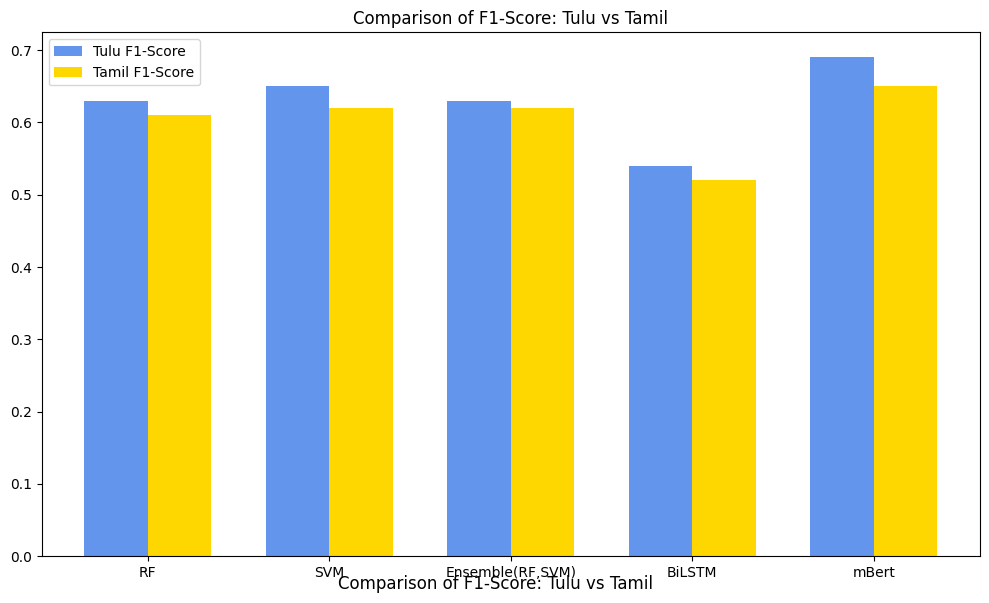

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Tulu Result Analysis
methods = ["RF", "SVM", "Ensemble(RF,SVM)", "BiLSTM", "mBert"]
f1_tulu = [0.63, 0.65, 0.63, 0.54, 0.69]
macro_avg_tulu = [0.41, 0.43, 0.41, 0.28, 0.46]
weighted_avg_tulu = [0.60, 0.62, 0.60, 0.48, 0.67]
accuracy_tulu = [0.62, 0.64, 0.62, 0.53, 0.68]

# Data for Tamil Result Analysis
f1_tamil = [0.61, 0.62, 0.62, 0.52, 0.65]
macro_avg_tamil = [0.39, 0.36, 0.39, 0.23, 0.43]
weighted_avg_tamil = [0.56, 0.55, 0.56, 0.44, 0.59]
accuracy_tamil = [0.62, 0.62, 0.61, 0.51, 0.64]

# Compare F1-Score for Tulu and Tamil
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(methods))
width = 0.35

bars1 = ax.bar(x - width / 2, f1_tulu, width, label="Tulu F1-Score", color="cornflowerblue")
bars2 = ax.bar(x + width / 2, f1_tamil, width, label="Tamil F1-Score", color="gold")


ax.set_title("Comparison of F1-Score: Tulu vs Tamil")
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()

plt.figtext(0.5, 0.01, "Comparison of F1-Score: Tulu vs Tamil", wrap=True, horizontalalignment='center', fontsize=12)
plt.tight_layout()
plt.show()


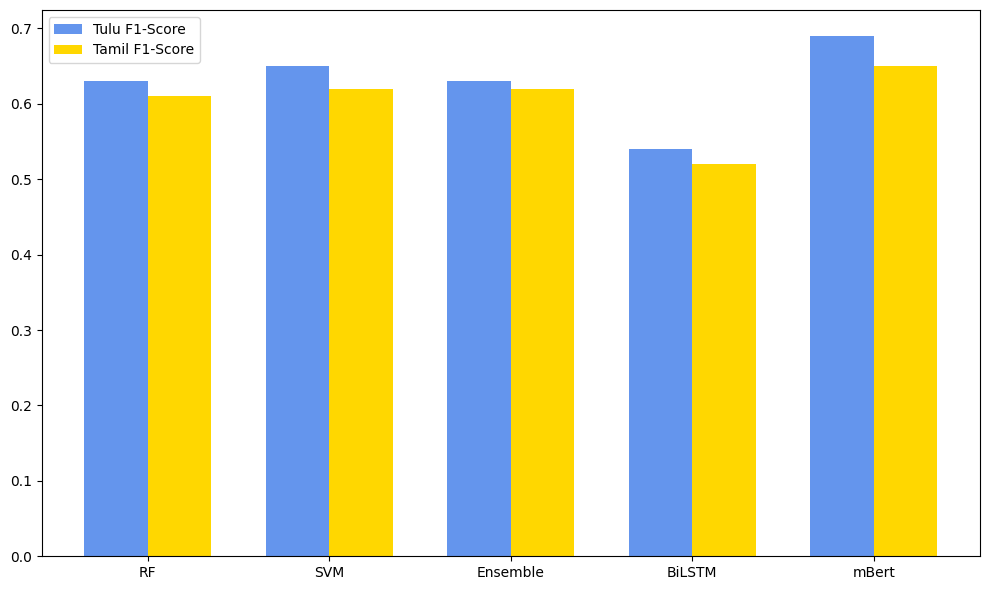

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Tulu Result Analysis
methods = ["RF", "SVM", "Ensemble", "BiLSTM", "mBert"]
f1_tulu = [0.63, 0.65, 0.63, 0.54, 0.69]
macro_avg_tulu = [0.41, 0.43, 0.41, 0.28, 0.46]
weighted_avg_tulu = [0.60, 0.62, 0.60, 0.48, 0.67]
accuracy_tulu = [0.62, 0.64, 0.62, 0.53, 0.68]

# Data for Tamil Result Analysis
f1_tamil = [0.61, 0.62, 0.62, 0.52, 0.65]
macro_avg_tamil = [0.39, 0.36, 0.39, 0.23, 0.43]
weighted_avg_tamil = [0.56, 0.55, 0.56, 0.44, 0.59]
accuracy_tamil = [0.62, 0.62, 0.61, 0.51, 0.64]

# Function to plot the data
def plot_result_analysis(methods, f1, macro_avg, weighted_avg, accuracy, title, filename):
    x = np.arange(len(methods))
    width = 0.2

    fig, ax = plt.subplots(figsize=(10, 6))

    bars1 = ax.bar(x - 1.5 * width, f1, width, label="F1-Score", color="cornflowerblue")
    bars2 = ax.bar(x - 0.5 * width, macro_avg, width, label="Macro Avg", color="mediumseagreen")
    bars3 = ax.bar(x + 0.5 * width, weighted_avg, width, label="Weighted Avg", color="gold")
    bars4 = ax.bar(x + 1.5 * width, accuracy, width, label="Accuracy", color="tomato")

    ax.set_xlabel("Methods")
    ax.set_title(title, loc='center', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(methods)
    ax.legend()

    plt.figtext(0.5, 0.01, title, wrap=True, horizontalalignment='center', fontsize=12)
    plt.tight_layout()
    plt.savefig(filename, format='png', dpi=300)
    plt.show()

# Plot Tulu Result Analysis
#plot_result_analysis(methods, f1_tulu, macro_avg_tulu, weighted_avg_tulu, accuracy_tulu, "Tulu Result Analysis", "tulu_result_analysis.png")

# Plot Tamil Result Analysis
#plot_result_analysis(methods, f1_tamil, macro_avg_tamil, weighted_avg_tamil, accuracy_tamil, "Tamil Result Analysis", "tamil_result_analysis.png")

# Compare F1-Score for Tulu and Tamil
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(methods))
width = 0.35

bars1 = ax.bar(x - width / 2, f1_tulu, width, label="Tulu F1-Score", color="cornflowerblue")
bars2 = ax.bar(x + width / 2, f1_tamil, width, label="Tamil F1-Score", color="gold")

print("\n")
print("\n")
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()

#plt.figtext(0.5, 0.01, "Comparison of F1-Score: Tulu vs Tamil", wrap=True, horizontalalignment='center', fontsize=10)
plt.tight_layout()
plt.savefig("f1_score_comparison.png", format='png', dpi=300)
plt.show()